# Perfect Store Impact on Energy Drink Sales Volume in Convenience

### Goal:

Identify what Perfect Store data points have what impact on sales (volume) in convenience stores. Drive better utilization of resources in order to increase sales (volume).

### Data Understanding and Limitations

Limited Data: 
- I have for confidentiality reasons picked a limited geography and period for the audits. Internally it is a very interesting dataset that can be used for a very relevant usecase, that I can't share to much about.

Sales Volume:
- It is defined as the volume (in oz) and not in dollars. Volume can of course be impacted by price ($) but I have picked a period where limited promotions are not impacting the volume. Between us and our main competitors the usage of promotions is fairly even.

Key Account and Distributor: 
- I added these two categorical features even though they aren't directly Perfect Store audited data.
- Key Accounts represent a range of low and high approaches to quality in store layout and experience, and they are ultimately responsible for executing the perfect store concept in the stores.
- Distributor was added because each represent differnt geographic areas, and I wanted to see if there was a relationship there. There is also a difference in the quality and way they work. 
  
Other Data: 
- It's not expected that the Perfect Store data will explain a majority or all of the volume but that a range of other data points may play in, that wont be included here. This is not considered an issue because just understanding the impactd of the existing data points is of interest.
    - Local activations, ours and competitors.
    - Promotions
    - Market share / demographic
    - Displays (this couild be part of future audits)
    - Brand messaging relevance (this could be part of future audits, e.g. does it match demographic in store).

Definition of Convenience:
- According to NACS Convenience is defined as: "ACS defines a convenience store as a retail business that provides the public with a convenient location to quickly purchase a wide variety of consumable products and services, generally food and gasoline" 

More details is available at: https://www.convenience.org/Research/Convenience-Store-Fast-Facts-and-Stats/What-is-a-Convenience-Store#:~:text=NACS%20defines%20a%20convenience%20store,services%2C%20generally%20food%20and%20gasoline

### Expected Result

Traditionally the following five data points has been believed to have the largest impact on sales:

* Brand Visibility Condition
* RB Energy strike zone fair share index
* Stores with Chilled Cashier placement 
* Voids (missing products in our portefolio relevant for the particular channel).
* Shelf Space Condition

As mentioned above, the model is not expected to explain everything. Other things beyond perfect store does polay in.

### Data Source and Definitions

Snowflake Query from BI: *.12_1 (internal, not available for public access)
- filtered for certain period and geographic area to maintain confidentiality.
- filtered for convenience stores only.

#### Fields:

* RB core SKUs availability condition: Number of core SKUs in Store

* % shelf space fair share index condition: Shelf space share in store compared to category. Can max be 100.

* % RB Energy strike zone fair share index: Strike zone share in store compared to category. C

* % Brand Visibility Condition: 
- Measure shows to what extent any kind of Brand Visibility (e.g. logo, rhombus, packshot image)  is placed with at least one placement of each placement type. Can max be 100.

* % Brand Messaging Condition: Measure shows to what extent any kind of Brand Messaging (e.g. Occasion, Functional, Consumer Activation)  is placed with at least one placement of each placement type. Can max be 100.

* % RB price communication in store condition: The extend to which price is communicated within the store for all SKU's listed. Can max be 100.

* % Additional ambient placement condition: Placement in the store in pct according to channel.

* % Additional chilled placement condition: Placement in the store in pct according to channel. Can max be 100.

* % Cashier placement cooler condition: Placement in the store in pct according to channel. Can max be 100.
          

* % Shelf Space Condition: Measure shows to which extent the Shelf Space score is achieved. It considers the sum of Shelf FSI and Strike Zone FSI for calculation.                      

* %POS Communication Condition: The extend to which all POS meets comm standards. Can max be 100.              

* Aux. # Available Placements Types in store: Auxiliary measure that shows how many different placement types are available in a certain store.   

* Cashiers in the outlet                     

* % Comp#1 Energy shelf space share: Percentage of # 1 Competitor Energy shelf space of total ED category shelf space.            

* % RB Energy shelf space share: Percentage of RB Energy shelf space of total ED category shelf space. This KPI is refering only to shelf space in main placement.               

* Stores with Add Chilled placement: KPI shows the total number of stores which have at least one Red Bull Additional Chilled Placement         

* % Stores with Additional Chilled placement: KPI shows the % stores with Additional Chilled Placement    

* Stores with Chilled Cashier placement        

* % Self Check Out Area in Store                 

* Average Main Competitor SKU: Measure that shows the number of different Main Competitor SKUs at main placement.                 

* Stores with Additional Ambient placement: KPI shows the total number of stores which have at least one Red Bull Additional Ambient Placement    

* % Stores with Additional Ambient placement      

* SKU range distrib voids sell: Number of missing mandatory SKUs.             

* SKU range distrib voids (Mand&Sec): Number of missing mandatory & secondary SKUs.       

* Actual Service Frequency   

### Data Preparation

In [75]:
# Packages Used
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
# Import 
energy_raw = pd.read_csv('data/energy.csv', delimiter=',')

In [77]:
# Info
energy_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Key Account                                  1047 non-null   int64  
 1   Store                                        1047 non-null   int64  
 2   RB core SKUs availability condition          1047 non-null   float64
 3   RB shelf space fair share index condition    1047 non-null   float64
 4   % RB Energy strike zone fair share index     1047 non-null   int64  
 5   % Brand Visibility Condition                 1047 non-null   float64
 6   % Brand Messaging Condition                  1047 non-null   float64
 7   % RB price communication in store condition  1047 non-null   int64  
 8    % Additional ambient placement condition    1047 non-null   int64  
 9   % Additional chilled placement condition     1047 non-null   int64  
 10  

In [78]:
energy = energy_raw

In [79]:
# Remove Duplicates
energy = energy.drop_duplicates()
# Remove records with NaN values
energy = energy.dropna()

### Data Exploration

In [80]:
# Change Data Types
# Convert features that are numeric to string so they become categorical
energy['Key Account'] = energy['Key Account'].astype('category')
energy['Distributor'] = energy['Distributor'].astype('category')

In [81]:
# Drop Store feature
energy = energy.drop(columns='Store')

### Data Exploration

#### Heatmap

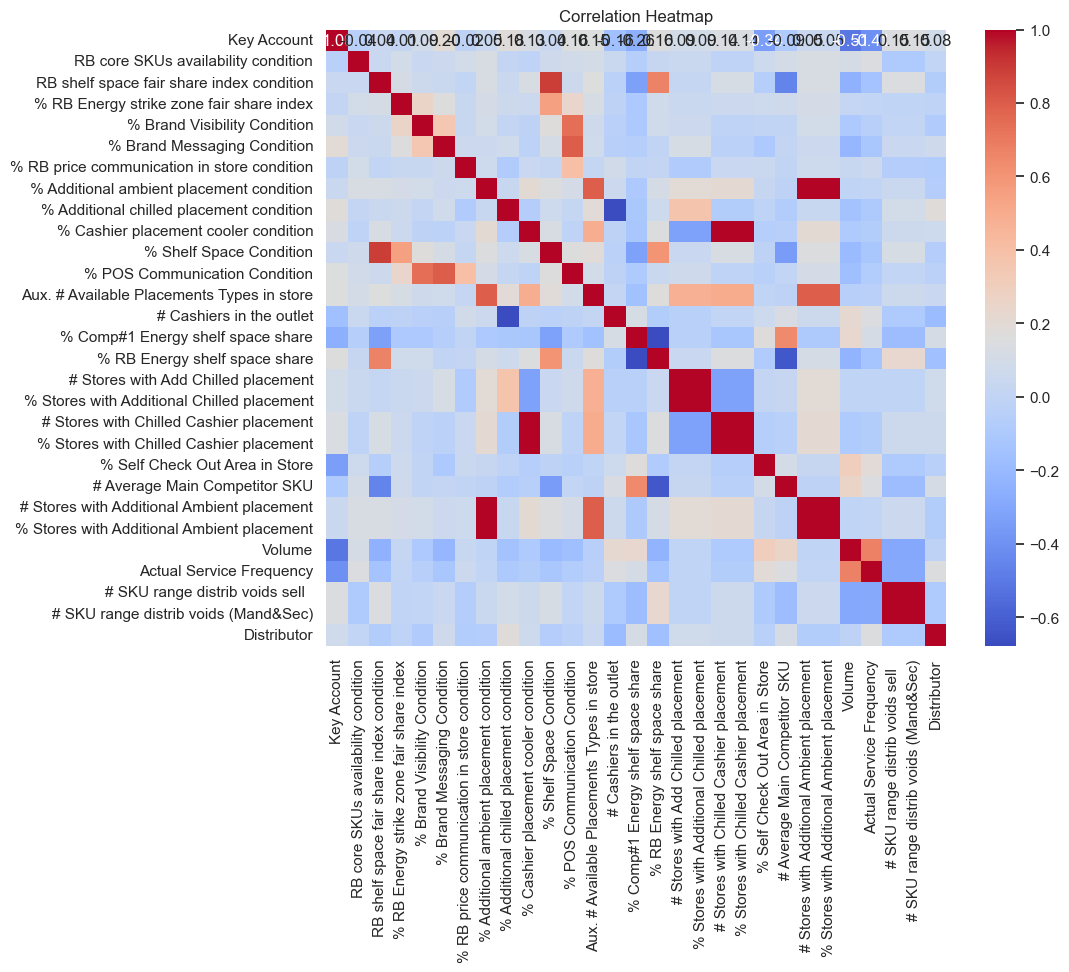

In [82]:
plt.figure(figsize=(10, 8))
sns.heatmap(energy.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Insight:
- Some variance in Distributor volume but nothing super crazy. A few distrubtors have big outliers though. (I will look more into that) 

#### Pairwise Relationships 

C:\Users\mgram1\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mgram1\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mgram1\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


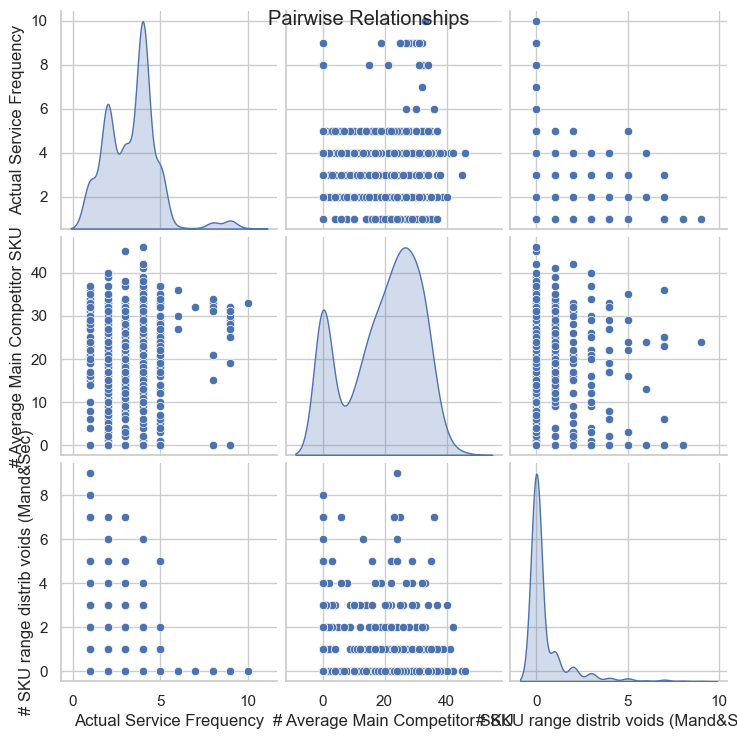

In [83]:
variables_of_interest = ['Actual Service Frequency', '# Average Main Competitor SKU', '# SKU range distrib voids (Mand&Sec)']
sns.pairplot(energy[variables_of_interest], kind='scatter', diag_kind='kde')
plt.suptitle('Pairwise Relationships')
plt.show()

#### Target Variable Distribution

In [84]:
# Summary of Target Variable Volume
volume_summary = energy['Volume'].describe()
volume_NaN = energy.isnull().sum()
volume_summary, volume_NaN

(count   1047.0000
 mean      58.1547
 std       45.8304
 min        2.0000
 25%       25.0000
 50%       45.0000
 75%       77.5000
 max      312.0000
 Name: Volume, dtype: float64,
 Key Account                                    0
 RB core SKUs availability condition            0
 RB shelf space fair share index condition      0
 % RB Energy strike zone fair share index       0
 % Brand Visibility Condition                   0
 % Brand Messaging Condition                    0
 % RB price communication in store condition    0
  % Additional ambient placement condition      0
 % Additional chilled placement condition       0
 % Cashier placement cooler condition           0
 % Shelf Space Condition                        0
 % POS Communication Condition                  0
 Aux. # Available Placements Types in store     0
 # Cashiers in the outlet                       0
 % Comp#1 Energy shelf space share              0
 % RB Energy shelf space share                  0
 # Stores with Ad

Insight: 
- A few very large outliers.
- May consider removing them but generalization should handle them for modeling


C:\Users\mgram1\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


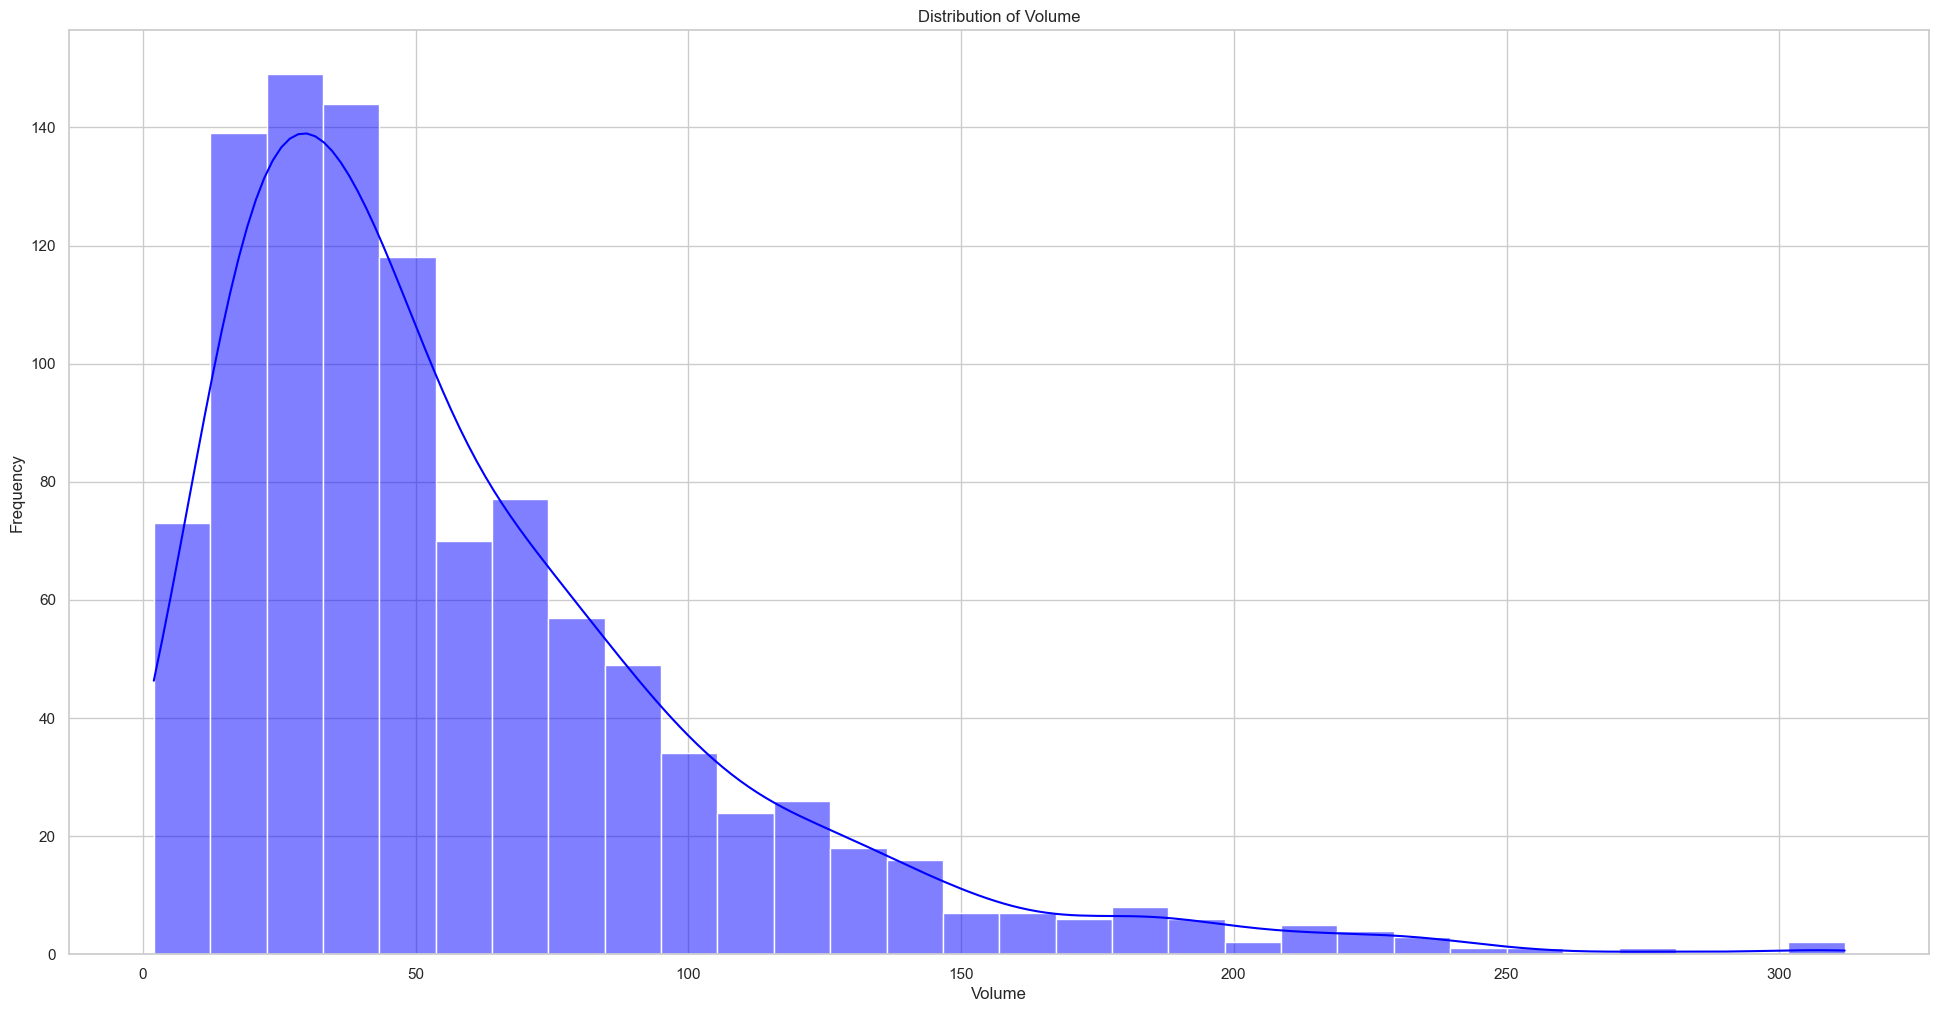

In [85]:
# Check Distribution of Volume

sns.set(style="whitegrid")
plt.figure(figsize=(24, 12))
sns.histplot(energy['Volume'], kde=True, color='blue')
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.show()

Insight:
- It is right skewed and looks like log transformation can make it more normal distributed

C:\Users\mgram1\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


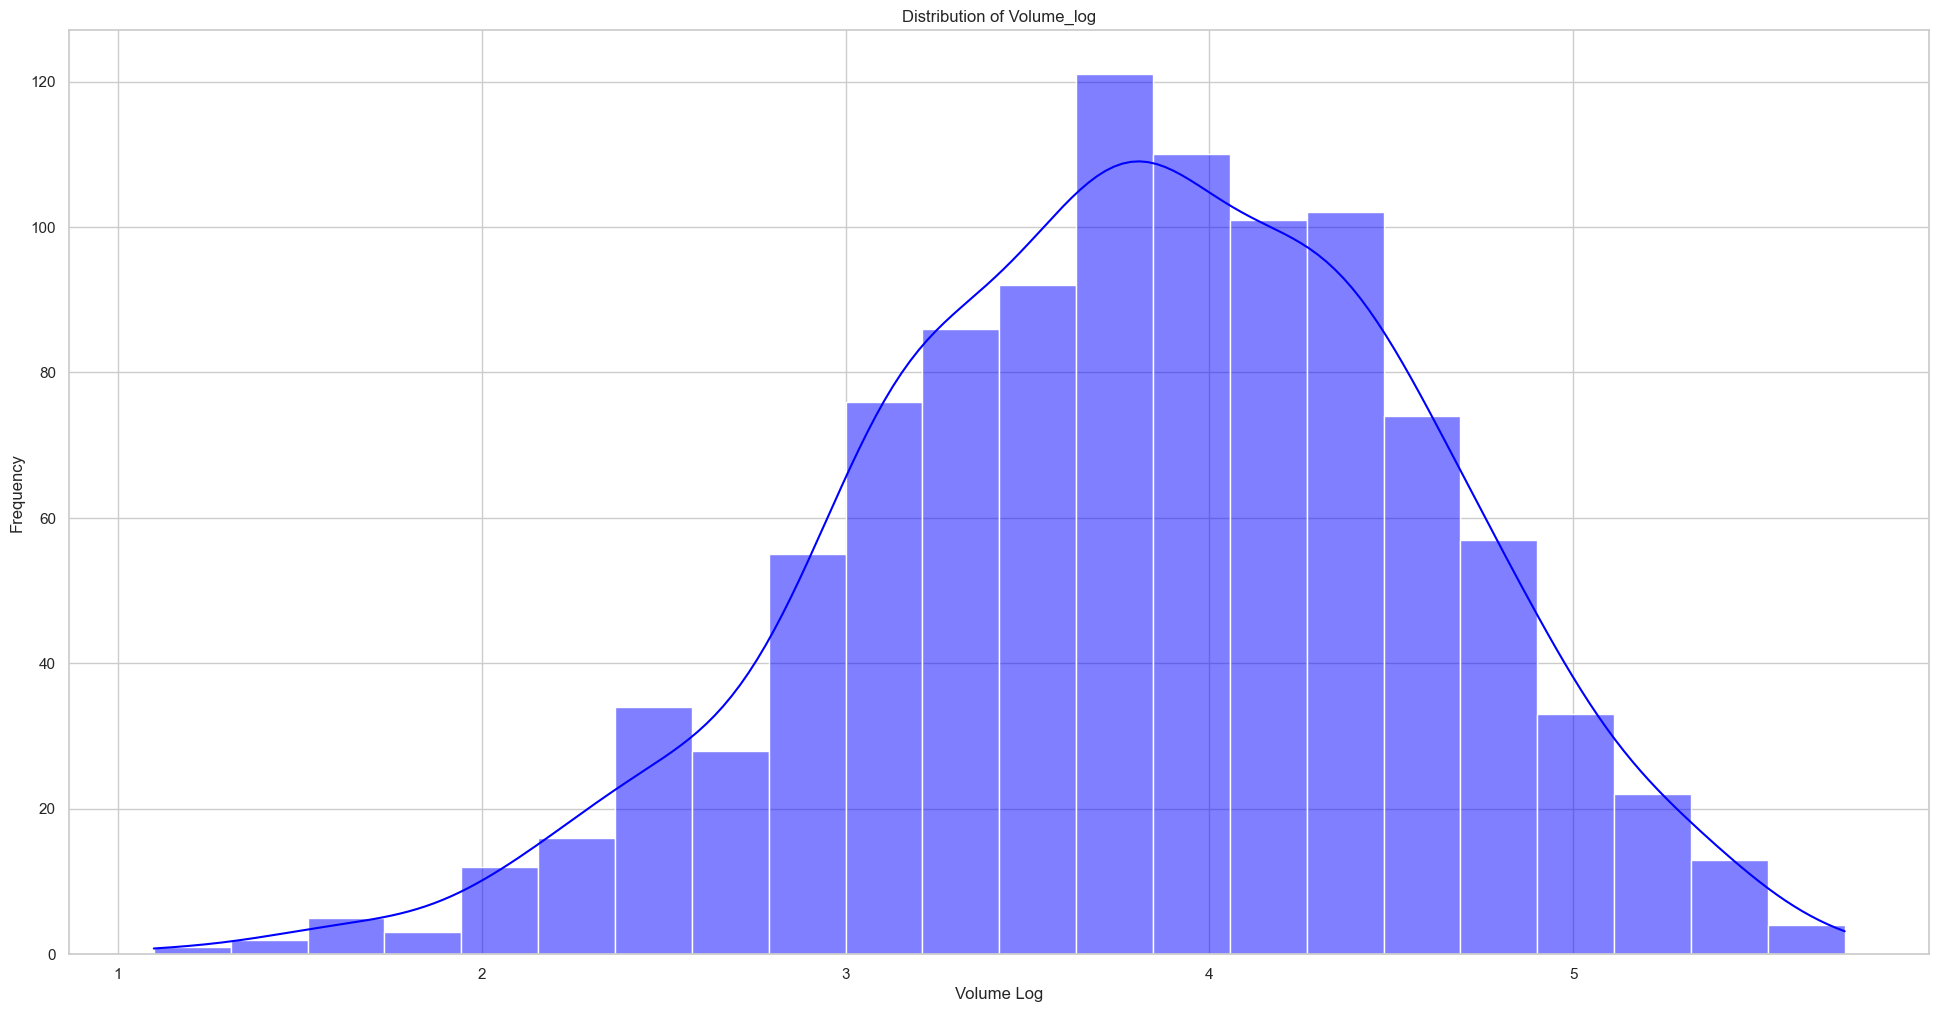

In [86]:
# Log Transformation of Volume into Volume_log

energy['Volume_log'] = np.log(energy['Volume'] + 1)
sns.set(style="whitegrid")
plt.figure(figsize=(24, 12))
sns.histplot(energy['Volume_log'], kde=True, color='blue')
plt.title('Distribution of Volume_log')
plt.xlabel('Volume Log')
plt.ylabel('Frequency')
plt.show()

Insight:
- Look normal distributed.
- I may add a test to see how much it is.

In [87]:
# Correlation of Features with Volume

energy_corr = energy.corr()['Volume'].sort_values(ascending=False)
energy_corr

Volume                                         1.0000
Volume_log                                     0.8934
Actual Service Frequency                       0.6733
% Self Check Out Area in Store                 0.3018
# Average Main Competitor SKU                  0.2540
% Comp#1 Energy shelf space share              0.2281
# Cashiers in the outlet                       0.2167
RB core SKUs availability condition            0.1118
% RB price communication in store condition    0.0322
% RB Energy strike zone fair share index       0.0201
% Stores with Additional Chilled placement    -0.0039
# Stores with Add Chilled placement           -0.0039
 % Additional ambient placement condition     -0.0050
# Stores with Additional Ambient placement    -0.0059
% Stores with Additional Ambient placement    -0.0059
Distributor                                   -0.0159
Aux. # Available Placements Types in store    -0.0541
# Stores with Chilled Cashier placement       -0.0879
% Stores with Chilled Cashie

In [88]:
# Remove Volume
energy = energy.drop('Volume', axis=1)

### Hot Encoding

In [89]:
# Hot-Encode of Categorical features Distributor and Key Account
energy_encoded = pd.get_dummies(energy, columns=['Distributor', 'Key Account'])

### Scaling

In [90]:
# Scale 
from sklearn.preprocessing import StandardScaler

# Identifying numeric columns (excluding the target variable)
numeric_columns = energy_encoded.select_dtypes(include=['float64', 'int64','bool']).columns.drop(['Volume_log'])

# Applying StandardScaler
scaler = StandardScaler()
energy_scaled = energy_encoded.copy()  
energy_scaled[numeric_columns] = scaler.fit_transform(energy_encoded[numeric_columns])


## Model Training

In [91]:
# Packages Used
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Regression

### Linear Regression

In [92]:
X = energy.drop('Volume_log', axis=1)  # Predictor variables
y = energy['Volume_log']  # Target variable

# Split the data into training and testing sets for validation purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Model performance
print(f'Regression - MSE: {mse:.4f}, R²: {r2:.4f}')

Regression - MSE: 0.2996, R²: 0.5327


#### Feature Coefficients

In [93]:
import pandas as pd

# Assuming 'model' is already trained and 'X' is your features DataFrame

# Features and their Coefficients
features = X.columns
coefficients = model.coef_

# Extracting features and their coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Add an 'Absolute Coefficient' column for sorting
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()

# Sort the DataFrame by the 'Absolute Coefficient' column in descending order
coefficients_sorted = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

# Set display format for floating point
pd.options.display.float_format = '{:.4f}'.format

# Display only the top 10 rows
top_10_coefficients = coefficients_sorted.head(10)
top_10_coefficients


,Feature,Coefficient,Absolute Coefficient
10,% Shelf Space Condition,-1.1768,1.1768
12,Aux. # Available Placements Types in store,1.1106,1.1106
2,RB shelf space fair share index condition,0.9058,0.9058
11,% POS Communication Condition,-0.3684,0.3684
3,% RB Energy strike zone fair share index,0.2683,0.2683
24,Actual Service Frequency,0.2442,0.2442
5,% Brand Messaging Condition,0.1379,0.1379
4,% Brand Visibility Condition,0.1377,0.1377
6,% RB price communication in store condition,0.0921,0.0921
26,# SKU range distrib voids (Mand&Sec),-0.0696,0.0696


### Regression on Scaled



In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the data into features and target variable
X = energy.drop('Volume_log', axis=1)
y = energy['Volume_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Linear Regression model with scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Make predictions with the scaled model
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate R² and MSE for the scaled data
r2_scaled = r2_score(y_test, y_pred_scaled)
mse_scaled = mean_squared_error(y_test, y_pred_scaled)

print(f'Regression Scaled - MSE: {mse_scaled:.4f}, R²: {r2_scaled:.4f}')


Regression Scaled - MSE: 0.2996, R²: 0.5327


Insight:
- Scaling produces a slight lower R^2 and larger MSE so is not preferred to the encoded version.
- Could be caused be sensitivity in standard scaling to outliers, or loss of interpretation because several of the features are categorical.

### Ridge Regression

In [95]:
from sklearn.linear_model import Ridge, Lasso

# Split the data into features and target variable
X = energy.drop('Volume_log', axis=1)
y = energy['Volume_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge regression model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate the Ridge model
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display the results
print(f'Ridge Regression - MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}')


Ridge Regression - MSE: 0.2988, R²: 0.5339


#### Feature Coefficents

In [104]:
import pandas as pd

# Assuming 'model' is already trained and 'X' is your features DataFrame

# Features and their Coefficients
features = X.columns
coefficients = ridge_model.coef_

# Extracting features and their coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Add an 'Absolute Coefficient' column for sorting
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()

# Sort the DataFrame by the 'Absolute Coefficient' column in descending order
coefficients_sorted = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

# Set display format for floating point
pd.options.display.float_format = '{:.4f}'.format

# Display only the top 10 rows
top_10_coefficients = coefficients_sorted.head(10)
top_10_coefficients

,Feature,Coefficient,Absolute Coefficient
12,Aux. # Available Placements Types in store,0.4811,0.4811
10,% Shelf Space Condition,-0.3364,0.3364
2,RB shelf space fair share index condition,0.2570,0.2570
24,Actual Service Frequency,0.2445,0.2445
11,% POS Communication Condition,-0.0816,0.0816
3,% RB Energy strike zone fair share index,0.0774,0.0774
25,# SKU range distrib voids sell,-0.0693,0.0693
26,# SKU range distrib voids (Mand&Sec),-0.0693,0.0693
13,# Cashiers in the outlet,0.0689,0.0689
23,% Stores with Additional Ambient placement,-0.0322,0.0322


#### Lasso Regression

In [97]:
from sklearn.linear_model import Ridge, Lasso

# Split the data into features and target variable
X = energy.drop('Volume_log', axis=1)
y = energy['Volume_log']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Ridge regression model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

# Make predictions and evaluate the Ridge model
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_ridge)

# Display the results
print(f'Lasso Regression - MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}')

Lasso Regression - MSE: 0.2988, R²: 0.5339


#### Feature Coefficients

In [98]:
import pandas as pd

# Assuming 'model' is already trained and 'X' is your features DataFrame

# Features and their Coefficients
features = X.columns
coefficients = lasso_model.coef_

# Extracting features and their coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Add an 'Absolute Coefficient' column for sorting
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()

# Sort the DataFrame by the 'Absolute Coefficient' column in descending order
coefficients_sorted = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

# Set display format for floating point
pd.options.display.float_format = '{:.4f}'.format

# Display only the top 10 rows
top_10_coefficients = coefficients_sorted.head(10)
top_10_coefficients

,Feature,Coefficient,Absolute Coefficient
21,# Average Main Competitor SKU,0.0027,0.0027
2,RB shelf space fair share index condition,-0.0024,0.0024
20,% Self Check Out Area in Store,0.0024,0.0024
15,% RB Energy shelf space share,-0.0016,0.0016
8,% Additional chilled placement condition,-0.0015,0.0015
17,% Stores with Additional Chilled placement,0.0004,0.0004
5,% Brand Messaging Condition,-0.0003,0.0003
6,% RB price communication in store condition,0.0003,0.0003
9,% Cashier placement cooler condition,-0.0002,0.0002
0,Key Account,-0.0001,0.0001


### Cross Validation  

#### Linear Regression Cross Validation

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Model
lr_model = LinearRegression()

# Cross-validation
cv_scores_mse_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean MSE and standard deviation of the cross-validation MSE scores
#mean_cv_scores_mse_lr = -cv_scores_mse_lr.mean()  # Convert negative MSE to positive
#std_cv_scores_mse_lr = cv_scores_mse_lr.std()

# Perform cross-validation using R² as the scoring metric for Linear Regression
#cv_scores_r2_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2')

# Mean R² 
mean_cv_scores_r2_lr = cv_scores_r2_lr.mean()

# Std R^2
std_cv_scores_r2_lr = cv_scores_r2_lr.std()

print(f'Cross Validation, Linear Regression - Mean R²: {mean_cv_scores_r2_lr:.4f}, Std R²: {std_cv_scores_r2_lr:.4f}')

Cross Validation, Linear Regression - Mean R²: 0.5596, Std R²: 0.0246


#### Ridge Regression Cross Validation

In [100]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores_r2_ridge_unscaled = cross_val_score(ridge_model, X_train, y_train, cv=5, scoring='r2')

# Mean R^2
mean_cv_scores_r2_ridge_unscaled = cv_scores_r2_ridge_unscaled.mean()

# Std R^2
std_cv_scores_r2_ridge_unscaled = cv_scores_r2_ridge_unscaled.std()

print(f'Cross Validation, Ridge - Mean R²: {mean_cv_scores_r2_ridge_unscaled:.4f}, Std of R²: {std_cv_scores_r2_ridge_unscaled:.4f}')

Cross Validation, Ridge - Mean R²: 0.5596, Std of R²: 0.0265


#### Lasso Cross Validation

In [101]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores_r2_lasso_unscaled = cross_val_score(lasso_model, X_train, y_train, cv=5, scoring='r2')

# Mean R^2
mean_cv_scores_r2_lasso_unscaled = cv_scores_r2_lasso_unscaled.mean()

# Std R^2 
std_cv_scores_r2_lasso_unscaled = cv_scores_r2_lasso_unscaled.std()

print(f'Cross Validation, Lasso - Mean R²: {mean_cv_scores_r2_lasso_unscaled:.4f}, Std of R²: {std_cv_scores_r2_lasso_unscaled:.4f}')

Cross Validation, Lasso - Mean R²: 0.2864, Std of R²: 0.0632


Insights:
- Ridge performs best as it has the highest mean R2. Lasso has a lower Std R2 but also a substantial lower R2.
- Lasso performs better than Ridge across different cross validations and is more consistent.
- The better mean R2 for Ridge though does not only fit the data better but good stable performance across different data splits.

### Ridge and Lasso Alpha Tuning with GridSearchCV

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Grid
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# GridSearchCV for Ridge
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, {'alpha': alpha_values}, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

# Best parameters and score for Ridge
best_alpha_ridge = ridge_grid.best_params_['alpha']
best_score_ridge = -ridge_grid.best_score_  # converting from negative MSE to positive

# GridSearchCV for Lasso
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, {'alpha': alpha_values}, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train_scaled, y_train)

# Best parameters and score for Lasso
best_alpha_lasso = lasso_grid.best_params_['alpha']
best_score_lasso = -lasso_grid.best_score_  # converting from negative MSE to positive

print(f'Ridge - Best Alpha: {best_alpha_ridge:.1f}, Best MSE: {best_score_ridge:.4f}')
print(f'Lasso - Best Alpha: {best_alpha_lasso:.3f}, Best MSE: {best_score_lasso:.4f}')

Ridge - Best Alpha: 100.0, Best MSE: 0.2537
Lasso - Best Alpha: 0.010, Best MSE: 0.2517


Insight:
- Ridge: Best alpha of 100 indicates a strong regularization effect, and suggest the model have experienced overfitting with lower values of alpha. Higher penalty has hslped reduced model complexity.
- Lasso: Low alpha suggest that regularization has already optimized the models performance.
- The same level of MSE indicates similar predictie performance.

### RandomForest or Other Models

In [103]:
# should I include. Discuss on call. Savio?

### Model Selection

The recommendation for model selection depends on several factors including model performance metrics.

* Linear Regression: reasonably good performance with the given dataset without any regularization, suggesting that the model was able to fit the data without signs of significant overfitting.

* Ridge Regression showed a similar level of performance as Linear Regression, indicating that adding L2 regularization did not result in a loss of predictive power. This could provide a safeguard against potential overfitting if new data has different characteristics or if the dataset is expanded.

* Lasso Regression performed comparably to Ridge after alpha tuning and has the additional advantage of performing feature selection by potentially reducing some coefficients to zero. This could be beneficial if the goal is to simplify the model and identify the most impactful features.

* Cross-Validation results indicated that Ridge Regression had a slight edge over Linear Regression in terms of MSE, suggesting better generalization across different data subsets.
Hyperparameter Tuning identified an optimal alpha for Ridge that was quite high, suggesting the need for strong regularization, whereas Lasso required only a slight regularization, indicating a sparse feature set might be adequate.

Given these considerations, here is the recommendation:

If the interpretability of the model is crucial and the number of features is manageable, Linear Regression could be recommended for its simplicity and reasonable performance.

There is concern about potential overfitting due to future data possibly having different characteristics, Ridge Regression could be the safer choice because of its regularization which helps control model complexity.

If feature selection is important, for example in a high-dimensional dataset where understanding which features are most predictive is valuable, Lasso Regression would be the recommended model, especially since it showed comparable performance to Ridge.

Ultimately, the best model would be the one that balances predictive accuracy, generalization to new data, interpretability, and complexity as per the stakeholders' needs and data characteristics. 

